# **Installing and importing the necessary libraries**

In [1]:
!pip install transformers datasets torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.8 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("instagram_english_reviews_sentiment.csv")
df.drop(columns = 'Unnamed: 0', inplace=True)
df

,content,score,sentiment
0,Great app for social media,1,Positive
1,Unable to log in An unexpected error occurred....,4,Negative
2,Please growth my channel,5,Positive
3,The bast app,5,Neutral
4,This is my favourite app,5,Neutral
...,...,...,...
55878,Its not cool tho,4,Negative
55879,not grow my post fastly,3,Neutral
55880,Instagram is the new Lifestyle exposure,5,Neutral
55881,this app very good,5,Positive


In [4]:
df = df.drop_duplicates(ignore_index=True)
df

,content,score,sentiment
0,Great app for social media,1,Positive
1,Unable to log in An unexpected error occurred....,4,Negative
2,Please growth my channel,5,Positive
3,The bast app,5,Neutral
4,This is my favourite app,5,Neutral
...,...,...,...
55878,Its not cool tho,4,Negative
55879,not grow my post fastly,3,Neutral
55880,Instagram is the new Lifestyle exposure,5,Neutral
55881,this app very good,5,Positive


## **Exploratory Data Analysis (EDA)**

In [5]:
df.shape

(55883, 3)

In [6]:
df.dtypes

,0
content,object
score,int64
sentiment,object


In [7]:
df.isna().sum()

,0
content,0
score,0
sentiment,0


In [8]:
df.describe()

,score
count,55883.000000
mean,3.421917
std,1.761463
min,1.000000
25%,1.000000
50%,4.000000
75%,5.000000
max,5.000000


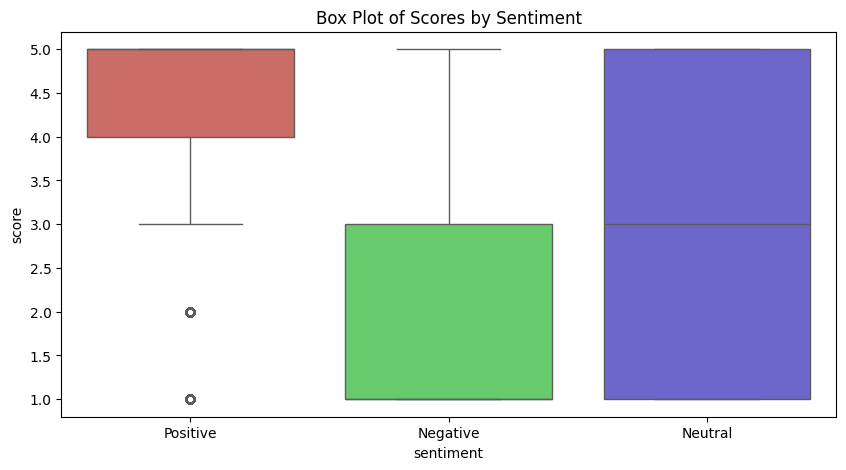

In [9]:
# Box Plot
plt.figure(figsize=(10, 5))
sns.boxplot(x='sentiment', y='score', data=df, palette = 'hls')
plt.title('Box Plot of Scores by Sentiment')
plt.show()

# **Data Visualization**

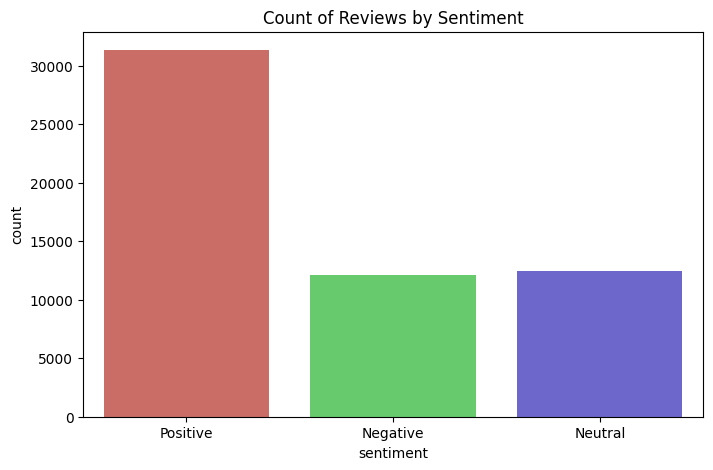

In [10]:
# Sentiment Count
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=df, palette = 'hls')
plt.title('Count of Reviews by Sentiment')
plt.show()

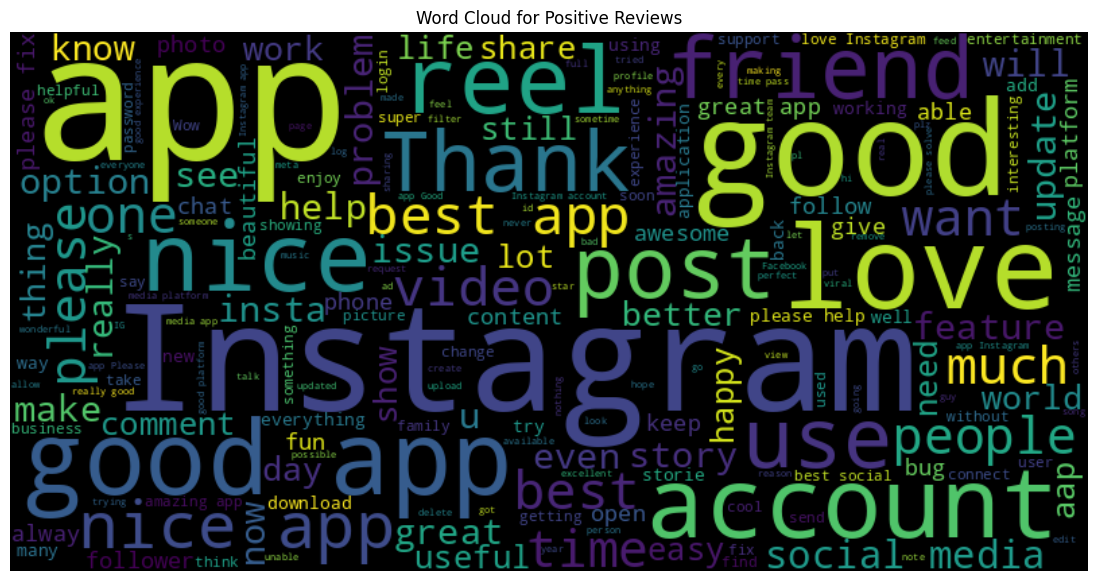

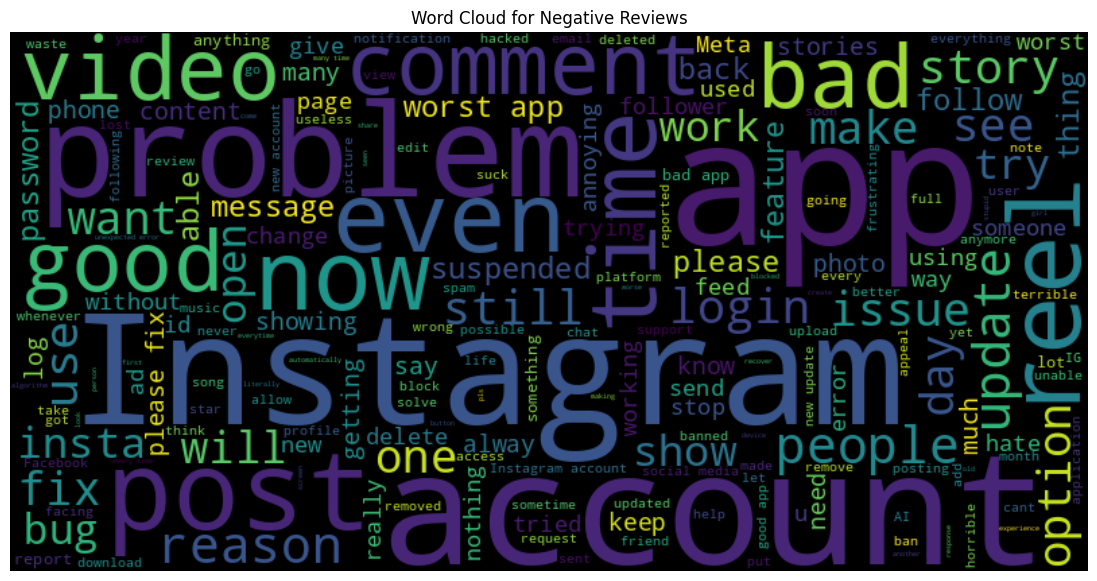

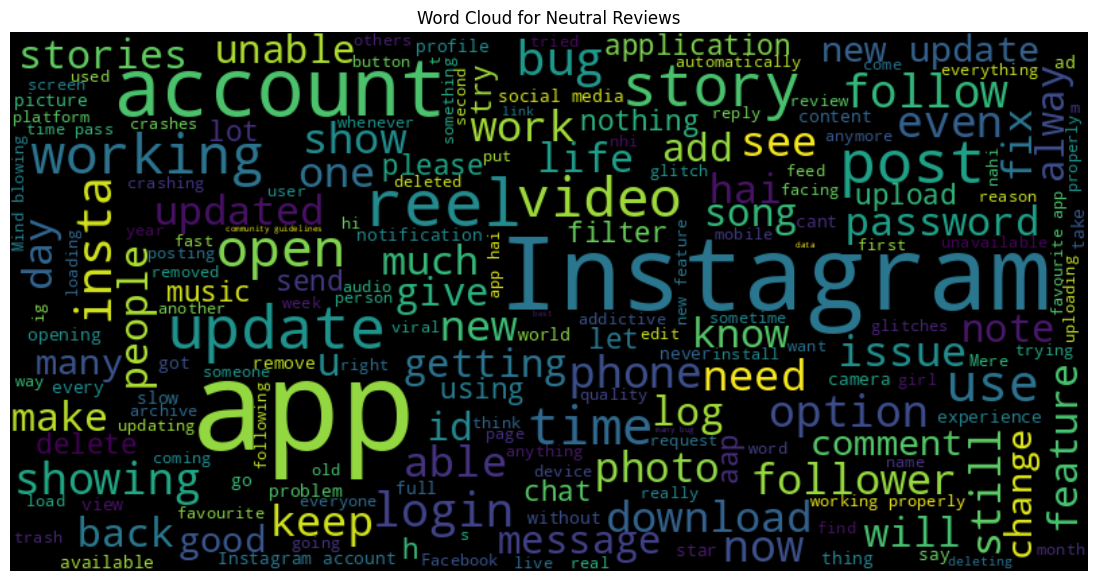

In [11]:
# Word Cloud for Sentiments
for sentiment in df['sentiment'].unique():
    text = ' '.join(df[df['sentiment'] == sentiment]['content'])
    wordcloud = WordCloud(width=800, height=400).generate(text)
    plt.figure(figsize=(14, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Reviews')
    plt.show()

# **Model Building**

In [12]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score

# Load your data
data = df.copy()

# Map sentiment labels to numerical values
sentiment_map = {'Positive': 2, 'Neutral': 1, 'Negative': 0}
data['label'] = data['sentiment'].map(sentiment_map)
data

,content,score,sentiment,label
0,Great app for social media,1,Positive,2
1,Unable to log in An unexpected error occurred....,4,Negative,0
2,Please growth my channel,5,Positive,2
3,The bast app,5,Neutral,1
4,This is my favourite app,5,Neutral,1
...,...,...,...,...
55878,Its not cool tho,4,Negative,0
55879,not grow my post fastly,3,Neutral,1
55880,Instagram is the new Lifestyle exposure,5,Neutral,1
55881,this app very good,5,Positive,2


In [13]:
# Split the data into training and validation sets
train_data, val_data = train_test_split(data, test_size=0.2, random_state=42)

# Print the shapes of the training and validation sets
print("Training data shape:", train_data.shape)
print("Validation data shape:", val_data.shape)

Training data shape: (44706, 4)
Validation data shape: (11177, 4)


## **Loading the model**

In [14]:
# Load the MiniLM tokenizer
model_name = "microsoft/MiniLM-L12-H384-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

## **Tokenization**

In [15]:
# Tokenization function
def tokenize_function(texts):
    return tokenizer(texts, padding=True, truncation=True, max_length=512)

# Tokenize the datasets
train_encodings = tokenize_function(train_data['content'].tolist())
val_encodings = tokenize_function(val_data['content'].tolist())

In [16]:
# Create a custom dataset class
class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [17]:
# Create dataset instances
train_dataset = SentimentDataset(train_encodings, train_data['label'].tolist())
val_dataset = SentimentDataset(val_encodings, val_data['label'].tolist())

In [18]:
# Load the MiniLM model for sequence classification
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)

pytorch_model.bin:   0%|          | 0.00/133M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at microsoft/MiniLM-L12-H384-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [19]:
# Define the compute_metrics function
def compute_metrics(p):
    preds = p.predictions.argmax(-1)  # Get the predicted class
    return {'accuracy': accuracy_score(p.label_ids, preds)}

# Set up training arguments with evaluation every 1500 steps
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    evaluation_strategy="steps",
    eval_steps=1500,
    save_steps=500,
    logging_steps=500,
)

# Create a Trainer instance
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics  # Pass the compute_metrics function
)

In [20]:
# Train the model
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Step,Training Loss,Validation Loss,Accuracy
1500,0.314900,0.273543,0.913304
3000,0.215000,0.244199,0.932361
4500,0.176400,0.206172,0.946408
6000,0.135000,0.203926,0.946318
7500,0.127900,0.191277,0.953029


TrainOutput(global_step=8385, training_loss=0.224604014406335, metrics={'train_runtime': 2347.1976, 'train_samples_per_second': 57.14, 'train_steps_per_second': 3.572, 'total_flos': 3865258880525952.0, 'train_loss': 0.224604014406335, 'epoch': 3.0})

In [21]:
# Evaluate the model
trainer.evaluate()

{'eval_loss': 0.1855931580066681,
 'eval_accuracy': 0.9534758879842534,
 'eval_runtime': 100.7285,
 'eval_samples_per_second': 110.962,
 'eval_steps_per_second': 6.939,
 'epoch': 3.0}

In [22]:
# Save the model and tokenizer
model.save_pretrained('./sentiment_miniLM_model')
tokenizer.save_pretrained('./sentiment_miniLM_model')

('./sentiment_miniLM_model/tokenizer_config.json',
 './sentiment_miniLM_model/special_tokens_map.json',
 './sentiment_miniLM_model/vocab.txt',
 './sentiment_miniLM_model/added_tokens.json',
 './sentiment_miniLM_model/tokenizer.json')

In [23]:
!zip -r sentiment_miniLM_model.zip ./sentiment_miniLM_model

  adding: sentiment_miniLM_model/ (stored 0%)
  adding: sentiment_miniLM_model/model.safetensors (deflated 12%)
  adding: sentiment_miniLM_model/tokenizer_config.json (deflated 75%)
  adding: sentiment_miniLM_model/vocab.txt (deflated 53%)
  adding: sentiment_miniLM_model/config.json (deflated 50%)
  adding: sentiment_miniLM_model/special_tokens_map.json (deflated 42%)
  adding: sentiment_miniLM_model/tokenizer.json (deflated 71%)


In [24]:
from google.colab import files
files.download('sentiment_miniLM_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>